In [2]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

# Morphological Transformations

- Morphologicla Transformation
  - 이미지를 Segmentation하여 단순화, 제거, 보정을 통해서 형태를 파악하는 목적으로 사용

  - 일반적으로 binary나 grayscale image에 사용

  - 사용하는 방법으로는 Dilation(팽창), Erosion(침식), 그리고 2개를 조합한 Opening과 Closing이 있음

  - 여기에는 2가지 Input값이 있는데, 하나는 원본 이미지이고 또 다른 하나는 structuring element

<br>

- structuring element
  
  - 원본 이미지에 적용되는 kernel
  
  - 중심을 원점으로 사용할 수도 있고, 원점을 변경할 수도 있음
  
  - 일반적으로 꽉찬 사각형, 타원형, 십자형을 많이 사용

### Erosion

- 각 Pixel에 structuring element를 적용하여 하나라도 0이 있으면 대상 pixel을 제거하는 방법

- 작은 object를 제거하는 효과

- `cv2.erode()`
  - Parameters
    - `src` : the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F

    - `kernel` : structuring element. cv2.getStructuringElemet() 함수로 만들 수 있음

    - `anchor` : structuring element의 중심. default (-1,-1)로 중심점

    - `iterations` : erosion 적용 반복 횟수

- 아래 그림은 대상 이미지에 십자형 structuring element를 적용한 결과

<img src="https://opencv-python.readthedocs.io/en/latest/_images/image01.png">

<sub>[이미지 출처] http://www.kocw.net/home/search/kemView.do?kemId=1127905&ar=relateCourse</sub>



### Dilation

- Erosion과 반대 작용

- 대상을 확장한 후 작은 구멍을 채우는 방법

- Erosion과 마찬가지로 각 pixel에 structuring element를 적용

- 대상 pixel에 대해서 OR 연산을 수행
  
  - 즉 겹치는 부분이 하나라도 있으면 이미지를 확장

  <img src="https://opencv-python.readthedocs.io/en/latest/_images/image03.png">


- `cv2.dilation()`

  - Parameters	
    - `src` : the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F

    - `kernel` : structuring element. cv2.getStructuringElemet() 함수로 만들 수 있음.

    - `anchor` : structuring element의 중심. default (-1,-1)로 중심점

    - `iterations` : dilation 적용 반복 횟수

### Opening & Closing
- Opening과 Closing은 Erosion과 Dilation의 조합 결과

- 차이는 어느 것을 먼저 적용을 하는 차이

- `Opening` : Erosion적용 후 Dilation 적용. 작은 Object나 돌기 제거에 적합

- `Closing` : Dilation적용 후 Erosion 적용. 전체적인 윤곽 파악에 적합

<img src="https://opencv-python.readthedocs.io/en/latest/_images/image05.png">

- `cv2.morphologyEx()`

  - Parameters
    
    - `src` : 원본 이미지. 채널수는 상관 없으나, depth는 다음 중 하나여야 함
        `CV_8U`, `CV_16U`, `CV_16S`, `CV_32F` or `CV_64F`.

    - `op` : 연산 방법

      - `MORPH_OPEN` : an opening operation

      - `MORPH_CLOSE` : a closing operation

      - `MORPH_GRADIENT` : a morphological gradient. Dilation과 erosion의 차이.

      - `MORPH_TOPHAT` : “top hat”. Opeining과 원본 이미지의 차이

      - `MORPH_BLACKHAT` : “black hat”. Closing과 원본 이미지의 차이

    - `kernel` : structuring element. `cv2.getStructuringElemet()` 함수로 만들 수 있음

    - `anchor` : structuring element의 중심. default (-1,-1)로 중심점

    - iterations` : erosion and dilation 적용 횟수

    - `borderType` : 픽셀 외삽법 `borderInterpolate` 참고  
      https://ko.wikipedia.org/wiki/%EB%B3%B4%EC%99%B8%EB%B2%95

    - `borderValue` : 테두리 값


## Structing Element  
- 사각형 모양의 structuring element는 numpy를 통해 만들 수 있음

In [3]:
kernel = np.ones((5, 5), np.uint8)

In [5]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

- 원이나 타원 모양이 필요한 경우, `cv2.getStructuringElement()` 이용

  - Parameters
    
    - `shape` : Element의 모양.

      - `MORPH_RET` : 사각형 모양

      - `MORPH_ELLIPSE` : 타원형 모양

      - `MORPH_CROSS` : 십자 모양

    - `ksize` : structuring element 사이즈

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [8]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

In [10]:
kernel

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [13]:
orig = cv2.imread('./i_1.png')
dot_image = cv2.imread('./i_2.png')
hole_image = cv2.imread('./i_3.png')

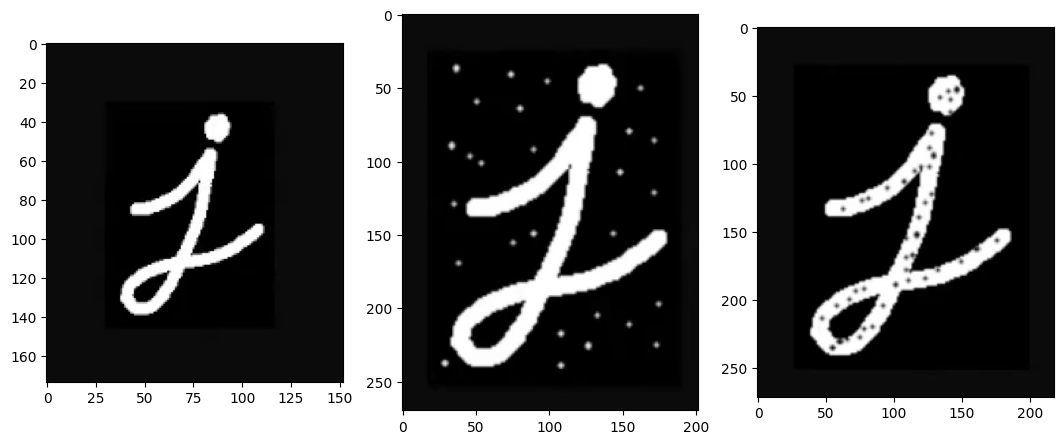

In [15]:
plt.figure(figsize=(13,10))
plt.subplot(1, 3, 1)
plt.imshow(orig)
plt.subplot(1, 3, 2)
plt.imshow(dot_image)
plt.subplot(1, 3, 3)
plt.imshow(hole_image)
plt.show()

In [16]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [39]:
erosion = cv2.erode(dot_image, kernel, iterations=1)
dilation = cv2.dilate(hole_image, kernel, iterations=1)

opening = cv2.morphologyEx(dot_image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(hole_image, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(orig, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(orig, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(orig, cv2.MORPH_BLACKHAT, kernel)

In [40]:
images = [dot_image, erosion, opening, hole_image, dilation, closing, gradient, tophat, blackhat]
titles = ['dot_images', 'erosion', 'opening', 'hole_image', 'dilation', 'closing', 'gradient', 'tophat', 'blackhat']

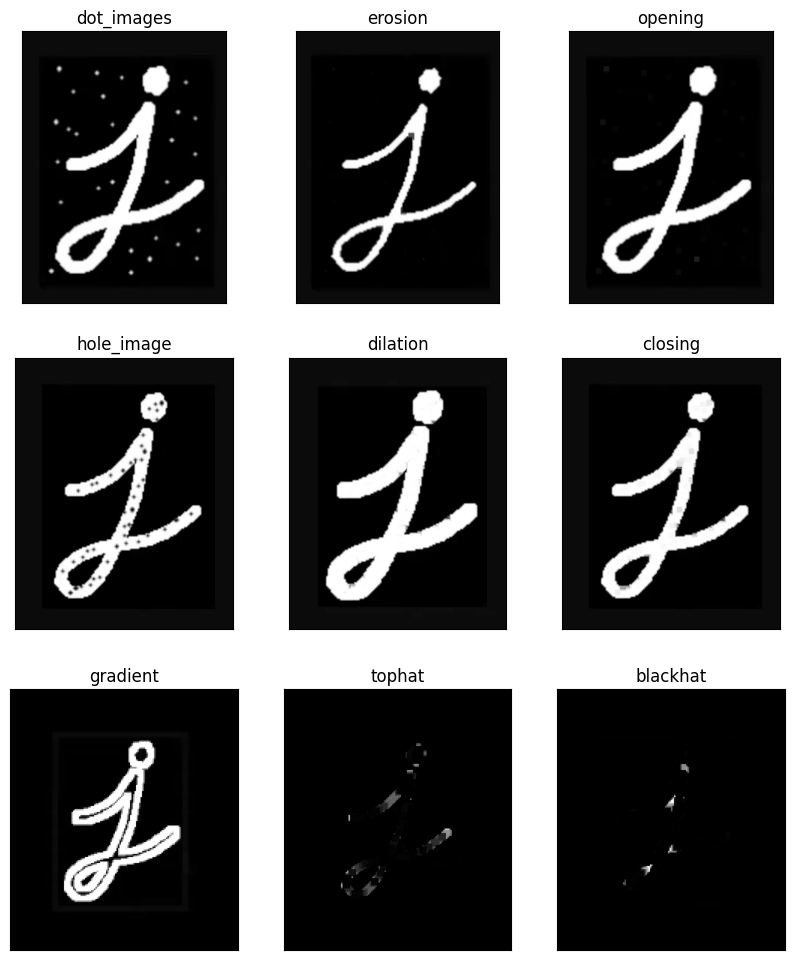

In [41]:
plt.figure(figsize=(10, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()